In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from datetime import datetime
import scipy.io as sio
import datetime
from datetime import datetime, timedelta


In [2]:
drifter_path = '/srv/scratch/z5297792/IN2023/2023_drifters.nc'
drifter_dataset = nc.Dataset(drifter_path, mode='r')

u_drif, v_drif = drifter_dataset['ve'][:].data/100, drifter_dataset['vn'][:].data/100
lon_drif, lat_drif = drifter_dataset['longitude'][:].data, drifter_dataset['latitude'][:].data
tim_drif, ID_drif = drifter_dataset['time'][:].data, drifter_dataset['ID'][:].data
dt_strings = [b''.join(row).decode('utf-8') for row in tim_drif]
tim_drif = [datetime.fromisoformat(s) for s in dt_strings]
df_drifters = pd.DataFrame({'ID': ID_drif.astype(int), 'Lon': lon_drif, 'Lat': lat_drif, 'Time': tim_drif})
df_drifters

,ID,Lon,Lat,Time
0,1,155.071686,-37.423271,2023-10-23 16:00:00
1,1,155.085403,-37.440243,2023-10-23 17:00:00
2,1,155.099655,-37.456573,2023-10-23 18:00:00
3,1,155.114456,-37.472240,2023-10-23 19:00:00
4,1,155.129669,-37.487103,2023-10-23 20:00:00
...,...,...,...,...
32704,19,157.954788,-33.808270,2023-12-30 18:00:00
32705,19,157.985443,-33.815174,2023-12-30 19:00:00
32706,19,158.015457,-33.820591,2023-12-30 20:00:00
32707,19,158.045380,-33.824436,2023-12-30 21:00:00


In [3]:
sadcp_data = sio.loadmat('/srv/scratch/z5297792/IN2023/sadcp.mat', simplify_cells=True)

z_sadcp = sadcp_data['z_sadcp']
u_sadcp = pd.DataFrame(sadcp_data['u_sadcp'], index=z_sadcp)
v_sadcp = pd.DataFrame(sadcp_data['v_sadcp'], index=z_sadcp)
lat_sadcp = sadcp_data['lat_sadcp']
lon_sadcp = sadcp_data['lon_sadcp']
tim_sadcp = sadcp_data['tim_sadcp']
julian_dates = tim_sadcp
ref_date = datetime(2000, 1, 1, 12)  # Julian day 2451545.0
gregorian_dates = [ref_date + timedelta(days=jd - 2451545.0) for jd in julian_dates]
tim_sadcp = gregorian_dates

depth = 37
df_sadcp = pd.DataFrame({'Lon': lon_sadcp, 'Lat': lat_sadcp, 'u': u_sadcp.loc[depth], 'v': v_sadcp.loc[depth], 'Time': tim_sadcp})
# df_sadcp.set_index('Time', inplace=True)
df_sadcp

,Lon,Lat,u,v,Time
0,151.320299,-33.889224,0.005571,-0.115798,2023-10-09 11:56:08.499988
1,151.336628,-33.915619,-0.007718,-0.126222,2023-10-09 12:13:38.666652
2,151.372994,-33.939047,-0.006178,-0.136486,2023-10-09 12:26:08.500002
3,151.426511,-33.973251,-0.040717,-0.105075,2023-10-09 12:43:38.666665
4,151.464043,-33.998656,-0.054494,-0.137621,2023-10-09 12:56:08.749984
...,...,...,...,...,...
2169,152.133657,-33.499170,-0.193570,-1.186649,2023-11-01 03:40:29.666685
2170,152.162703,-33.499744,-0.265587,-1.283703,2023-11-01 03:55:29.333340
2171,152.191377,-33.499695,-0.273816,-1.294686,2023-11-01 04:10:29.666658
2172,152.220223,-33.499658,-0.283102,-1.272112,2023-11-01 04:25:29.333353


In [4]:
print(df_drifters['Lon'].min(),df_drifters['Lon'].max(),df_drifters['Lat'].min(),df_drifters['Lat'].max())
print(df_drifters['Time'].min(),df_drifters['Time'].max())

150.1566619873047 168.86436462402344 -41.22463607788086 -27.926733016967773
2023-10-10 05:49:00 2023-12-30 23:00:00


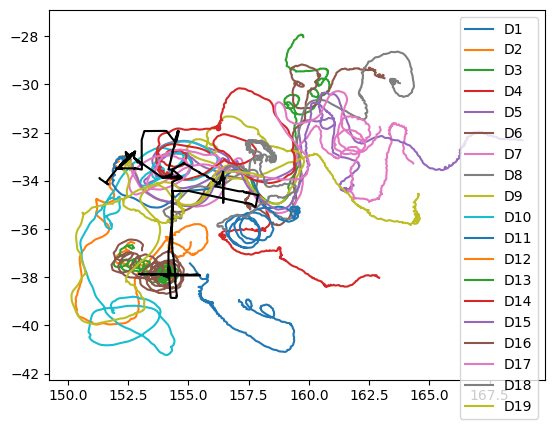

In [5]:
for ID in df_drifters['ID'].unique():

    df_drif = df_drifters[df_drifters['ID']==ID]
    plt.plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')

plt.axis('equal')
plt.legend()

plt.plot(df_sadcp['Lon'], df_sadcp['Lat'], c='k')


,ID,Lon,Lat,Time
0,1,155.071686,-37.423271,2023-10-23 16:00:00
1,1,155.085403,-37.440243,2023-10-23 17:00:00
2,1,155.099655,-37.456573,2023-10-23 18:00:00
3,1,155.114456,-37.472240,2023-10-23 19:00:00
4,1,155.129669,-37.487103,2023-10-23 20:00:00
...,...,...,...,...
31366,19,150.648758,-37.501244,2023-10-31 23:00:00
31367,19,150.663376,-37.527210,2023-11-01 01:00:00
31368,19,150.677582,-37.554146,2023-11-01 02:00:00
31369,19,150.688431,-37.578384,2023-11-01 03:00:00


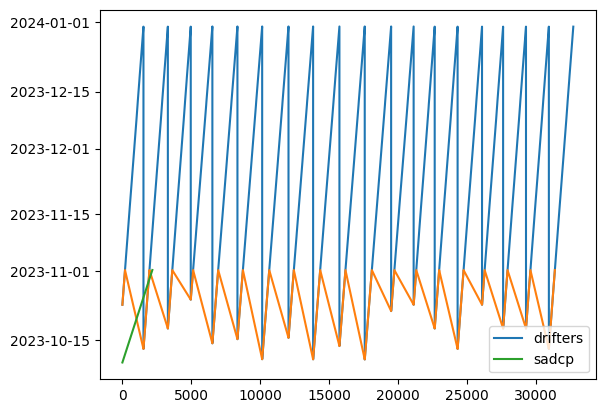

In [6]:
t1_sadcp = df_sadcp['Time'].min()
t2_sadcp = df_sadcp['Time'].max()

plt.plot(df_drifters['Time'], label='drifters')
plt.plot(df_drifters[df_drifters['Time']<=t2_sadcp]['Time'])
plt.plot(df_sadcp['Time'], label='sadcp')
plt.legend()

df_relative_drifters = df_drifters[(df_drifters['Time'] >= t1_sadcp) & (df_drifters['Time'] <= t2_sadcp)]
df_relative_drifters

Text(154.5, -37.5, 'CE2')

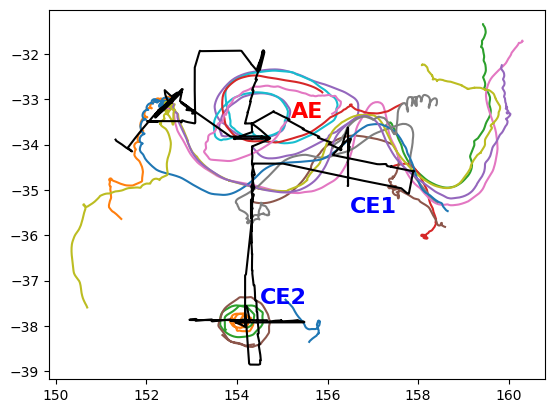

In [7]:
for ID in df_relative_drifters['ID'].unique():

    df_drif = df_relative_drifters[df_relative_drifters['ID']==ID]
    plt.plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')

plt.axis('equal')
# plt.legend()

plt.plot(df_sadcp['Lon'], df_sadcp['Lat'], c='k')
plt.text(155.2, -33.4, 'AE', fontweight='bold', fontsize=16, color='r')
plt.text(156.5, -35.5, 'CE1', fontweight='bold', fontsize=16, color='b')
plt.text(154.5, -37.5, 'CE2', fontweight='bold', fontsize=16, color='b')

### AE

[1 2 3]


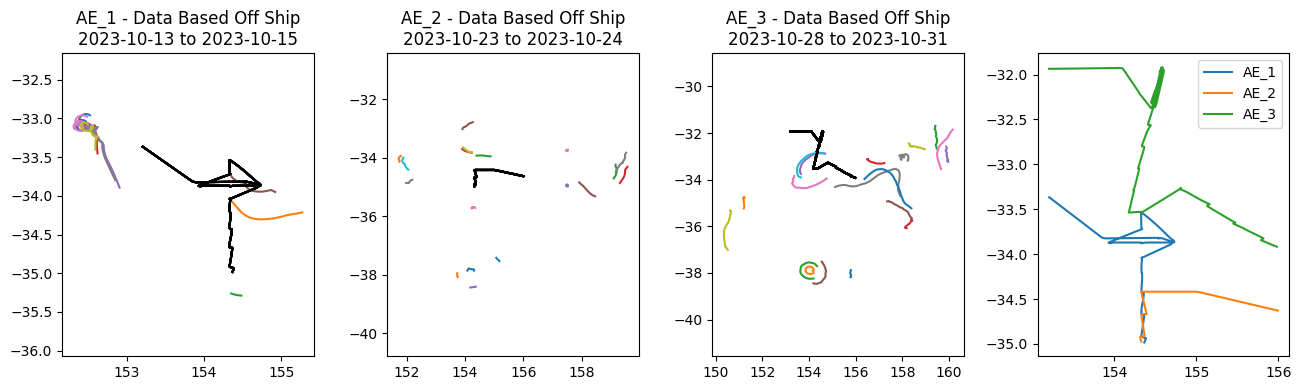

In [8]:
df_AE_sadcp = df_sadcp[(df_sadcp['Lon'] >= 153.2) & (df_sadcp['Lon'] < 156) & (df_sadcp['Lat'] >= -35)]
df_AE_drifters = df_relative_drifters[(df_relative_drifters['Lon'] >= 153.2) & (df_relative_drifters['Lon'] < 156) & (df_relative_drifters['Lat'] >= -35)]

t1_AE = df_AE_sadcp['Time'].min()
t2_AE = df_AE_sadcp['Time'].max()

df_AE_sadcp = df_AE_sadcp.copy() 
df_AE_sadcp.loc[:, 'Group'] = (df_AE_sadcp.index.to_series().diff() != 1).cumsum()

print(df_AE_sadcp['Group'].unique())
for group in df_AE_sadcp['Group'].unique():
    if group == 1:
        df_AE_1_sadcp = df_AE_sadcp[df_AE_sadcp['Group']==group]
        df = df_AE_1_sadcp.copy()
    if group == 2:
        df_AE_2_sadcp = df_AE_sadcp[df_AE_sadcp['Group']==group]
        df = df_AE_2_sadcp.copy()
    if group == 3:
        df_AE_3_sadcp = df_AE_sadcp[df_AE_sadcp['Group']==group]
        df = df_AE_3_sadcp.copy()

    t1 = df['Time'].min()
    t2 = df['Time'].max()

    if group == 1:
        df_AE_1_sadcp_drifters = df_relative_drifters[(df_relative_drifters['Time']>=t1)&(df_relative_drifters['Time']<=t2)]
    if group == 2:
        df_AE_2_sadcp_drifters = df_relative_drifters[(df_relative_drifters['Time']>=t1)&(df_relative_drifters['Time']<=t2)]
    if group == 3:
        df_AE_3_sadcp_drifters = df_relative_drifters[(df_relative_drifters['Time']>=t1)&(df_relative_drifters['Time']<=t2)]

fig, axs = plt.subplots(1, 4, figsize=(13, 4))

for ID in df_AE_1_sadcp_drifters['ID'].unique():
    df_drif = df_AE_1_sadcp_drifters[df_AE_1_sadcp_drifters['ID']==ID]
    axs[0].plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')
    axs[0].plot(df_AE_1_sadcp['Lon'], df_AE_1_sadcp['Lat'], 'k')
    t1 = df_AE_1_sadcp['Time'].min().round('D').date()
    t2 = df_AE_1_sadcp['Time'].max().round('D').date()
    axs[0].set_title(f'AE_1 - Data Based Off Ship\n{t1} to {t2}')
    axs[0].axis('equal')
    
for ID in df_AE_2_sadcp_drifters['ID'].unique():
    df_drif = df_AE_2_sadcp_drifters[df_AE_2_sadcp_drifters['ID']==ID]
    axs[1].plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')
    axs[1].plot(df_AE_2_sadcp['Lon'], df_AE_2_sadcp['Lat'], 'k')
    t1 = df_AE_2_sadcp['Time'].min().round('D').date()
    t2 = df_AE_2_sadcp['Time'].max().round('D').date()
    axs[1].set_title(f'AE_2 - Data Based Off Ship\n{t1} to {t2}')
    axs[1].axis('equal')
    
for ID in df_AE_3_sadcp_drifters['ID'].unique():
    df_drif = df_AE_3_sadcp_drifters[df_AE_3_sadcp_drifters['ID']==ID]
    axs[2].plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')
    axs[2].plot(df_AE_3_sadcp['Lon'], df_AE_3_sadcp['Lat'], 'k')
    t1 = df_AE_3_sadcp['Time'].min().round('D').date()
    t2 = df_AE_3_sadcp['Time'].max().round('D').date()
    axs[2].set_title(f'AE_3 - Data Based Off Ship\n{t1} to {t2}')
    axs[2].axis('equal')

axs[3].plot(df_AE_1_sadcp['Lon'], df_AE_1_sadcp['Lat'], label='AE_1')
axs[3].plot(df_AE_2_sadcp['Lon'], df_AE_2_sadcp['Lat'], label='AE_2')
axs[3].plot(df_AE_3_sadcp['Lon'], df_AE_3_sadcp['Lat'], label='AE_3')
axs[3].legend()
    
plt.tight_layout()
plt.show()


In [9]:
df_AE_drifters

,ID,Lon,Lat,Time
6528,5,154.343857,-34.056969,2023-10-14 04:46:00
6529,5,154.358093,-34.071743,2023-10-14 05:46:00
6530,5,154.375916,-34.091545,2023-10-14 06:00:00
6531,5,154.397690,-34.116673,2023-10-14 07:00:00
6532,5,154.421646,-34.145573,2023-10-14 08:00:00
...,...,...,...,...
27934,17,155.021317,-33.580070,2023-10-31 23:00:00
27935,17,155.037582,-33.560913,2023-11-01 01:00:00
27936,17,155.051819,-33.541798,2023-11-01 02:00:00
27937,17,155.061584,-33.525257,2023-11-01 03:00:00


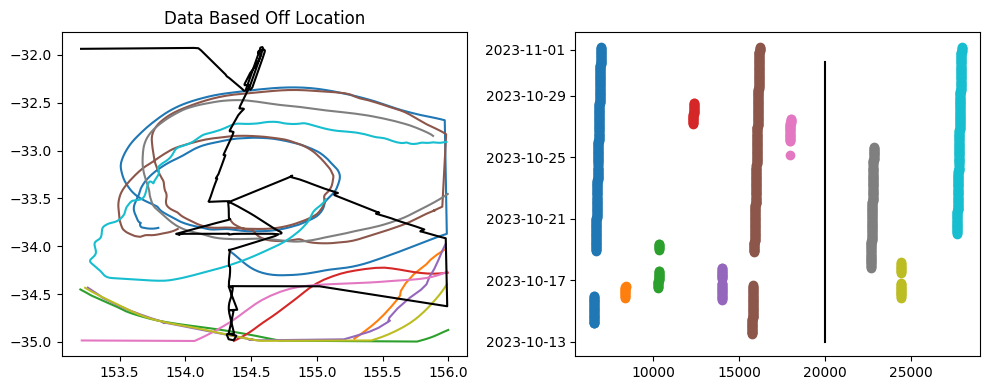

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for ID in df_AE_drifters['ID'].unique():
    df_drif = df_AE_drifters[df_AE_drifters['ID']==ID]
    axs[0].plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')
    axs[1].scatter(df_drif.index, df_drif['Time'], label=f'D{ID}')

t1 = df_AE_drifters['Time'].min()
t2 = df_AE_drifters['Time'].max()
df = df_AE_sadcp[(df_AE_sadcp['Time'] >= t1) & (df_AE_sadcp['Time'] <= t2)]
axs[0].plot(df['Lon'], df['Lat'], 'k')

axs[1].plot([20000, 20000], [df_AE_sadcp['Time'].min(), df_AE_sadcp['Time'].max()], 'k')

axs[0].set_title('Data Based Off Location')
plt.tight_layout()
plt.show()

### CE1

Text(0.5, 1.0, 'CE1 - Data Based Off Ship\n2023-10-24 to 2023-10-28')

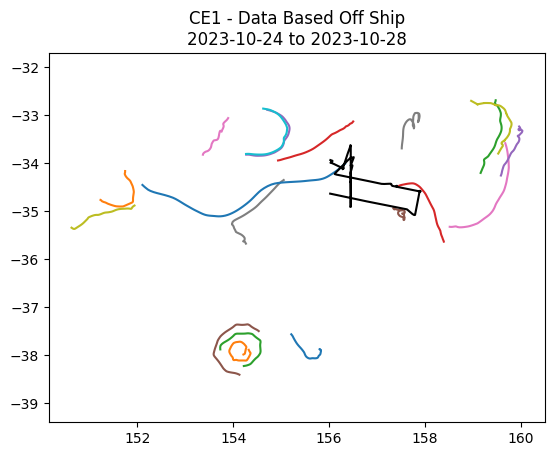

In [11]:
df_CE1_sadcp = df_sadcp[(df_sadcp['Lon'] >= 156) & (df_sadcp['Lon'] <= 158)]
df_CE1_drifters = df_relative_drifters[(df_relative_drifters['Lon'] >= 156) & (df_relative_drifters['Lon'] <= 158)]

t1_CE1 = df_CE1_sadcp['Time'].min()
t2_CE1 = df_CE1_sadcp['Time'].max()

df_CE1_sadcp_drifters = df_relative_drifters[(df_relative_drifters['Time']>=t1_CE1)&(df_relative_drifters['Time']<=t2_CE1)]

for ID in df_CE1_sadcp_drifters['ID'].unique():

    df_drif = df_CE1_sadcp_drifters[df_CE1_sadcp_drifters['ID']==ID]
    plt.plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')

plt.axis('equal')
# plt.legend()

plt.plot(df_CE1_sadcp['Lon'], df_CE1_sadcp['Lat'], 'k')

plt.title(f"CE1 - Data Based Off Ship\n{t1_CE1.round('D').date()} to {t2_CE1.round('D').date()}")

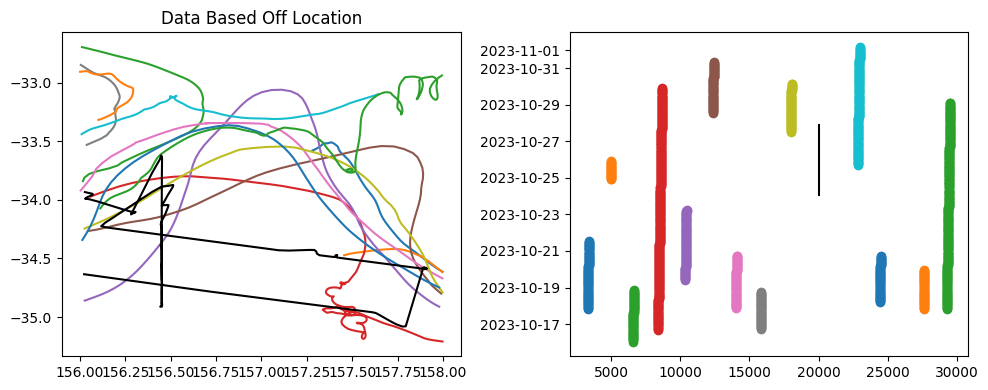

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for ID in df_CE1_drifters['ID'].unique():
    df_drif = df_CE1_drifters[df_CE1_drifters['ID']==ID]
    axs[0].plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')
    axs[1].scatter(df_drif.index, df_drif['Time'], label=f'D{ID}')

t1 = df_CE1_drifters['Time'].min()
t2 = df_CE1_drifters['Time'].max()
df = df_CE1_sadcp[(df_CE1_sadcp['Time'] >= t1) & (df_CE1_sadcp['Time'] <= t2)]
axs[0].plot(df['Lon'], df['Lat'], 'k')

axs[1].plot([20000, 20000], [df_CE1_sadcp['Time'].min(), df_CE1_sadcp['Time'].max()], 'k')

axs[0].set_title('Data Based Off Location')
plt.tight_layout()
plt.show()

### CE2

Text(0.5, 1.0, 'CE2 - Data Based Off Ship\n2023-10-17 to 2023-10-22')

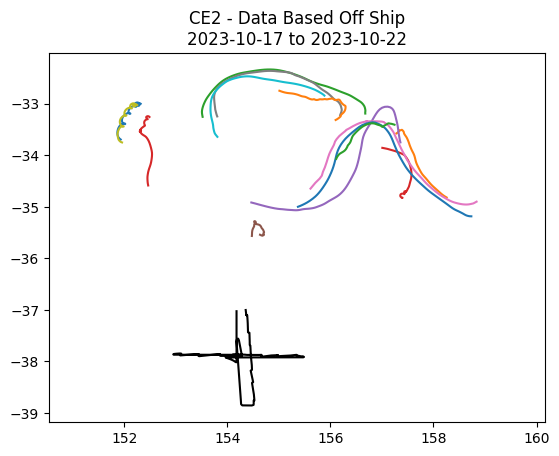

In [13]:
df_CE2_sadcp = df_sadcp[(df_sadcp['Lat'] <= -37) & (df_sadcp['Lon'] >= 152)]
df_CE2_drifters = df_relative_drifters[(df_relative_drifters['Lat'] < -37) & (df_relative_drifters['Lon'] >= 152)]

t1_CE2 = df_CE2_sadcp['Time'].min()
t2_CE2 = df_CE2_sadcp['Time'].max()

df_CE2_sadcp_drifters = df_relative_drifters[(df_relative_drifters['Time']>=t1_CE2)&(df_relative_drifters['Time']<=t2_CE2)]

for ID in df_CE2_sadcp_drifters['ID'].unique():

    df_drif = df_CE2_sadcp_drifters[df_CE2_sadcp_drifters['ID']==ID]
    plt.plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')

plt.axis('equal')
# plt.legend()

plt.plot(df_CE2_sadcp['Lon'], df_CE2_sadcp['Lat'], 'k')

plt.title(f"CE2 - Data Based Off Ship\n{t1_CE2.round('D').date()} to {t2_CE2.round('D').date()}")

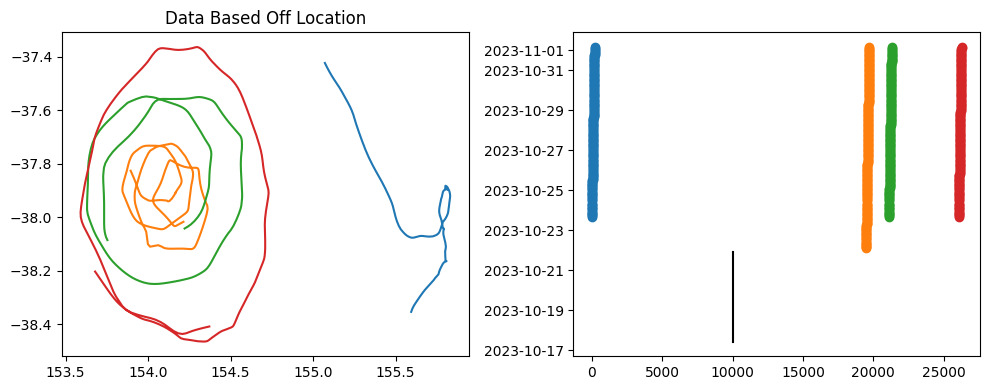

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for ID in df_CE2_drifters['ID'].unique():
    df_drif = df_CE2_drifters[df_CE2_drifters['ID']==ID]
    axs[0].plot(df_drif['Lon'], df_drif['Lat'], label=f'D{ID}')
    axs[1].scatter(df_drif.index, df_drif['Time'], label=f'D{ID}')

t1 = df_CE2_drifters['Time'].min()
t2 = df_CE2_drifters['Time'].max()
df = df_CE2_sadcp[(df_CE2_sadcp['Time'] >= t1) & (df_CE2_sadcp['Time'] <= t2)]
axs[0].plot(df['Lon'], df['Lat'], 'k')

axs[1].plot([10000, 10000], [df_CE2_sadcp['Time'].min(), df_CE2_sadcp['Time'].max()], 'k')

axs[0].set_title('Data Based Off Location')
plt.tight_layout()
plt.show()

## ESPRA

In [15]:
def espra(xi, yi, ui, vi):
    from scipy.optimize import least_squares
    if np.any(np.isnan(ui)):
        return np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
    def residuals(params, x, y, u_i, v_i):
        x0, y0, q11, q12, q22 = params
        u = -2 * q22 * (y - y0) - 2 * q12 * (x - x0)
        v =  2 * q11 * (x - x0) + 2 * q12 * (y - y0)
        return np.concatenate([(u - u_i), (v - v_i)])
    def fit_params(x, y, u_i, v_i):
        x0_init, y0_init = np.mean(x), np.mean(y)
        q11_init, q12_init, q22_init = 1.0, 0.0, 1.0  # Initial guesses
        params_init = [x0_init, y0_init, q11_init, q12_init, q22_init]
        result = least_squares(residuals, params_init, args=(x, y, u_i, v_i))
        return result.x 
    x0, y0, q11, q12, q22 = fit_params(xi, yi, ui, vi)
    w = 2*(q11 + q22)
    Q = np.array([[q11, q12], [q12, q22]])
    return x0, y0, Q, w

def plot_ellipse(Q, center=(0, 0), scale=1):
    def normalize_matrix(A, norm_type='fro'):
        norm = np.linalg.norm(A, 'fro') if norm_type == 'fro' else np.max(np.abs(A))
        return A / norm if norm else A
    Q = normalize_matrix(Q)

    def swap_principal_axes(Q):
        eigvals, eigvecs = np.linalg.eigh(Q)
        return eigvecs @ np.diag(eigvals[::-1]) @ eigvecs.T

    Q = swap_principal_axes(Q)
    
    eigenvalues, eigenvectors = np.linalg.eigh(Q)
    if np.any(eigenvalues < 0):

        Q = np.array([[np.abs(Q[0,0]), Q[0,1]], [Q[1,0], np.abs(Q[1,1])]])

        def flip_Q_y(Q):
            F_y = np.diag([-1, 1])
            return F_y.T @ Q @ F_y

        Q = flip_Q_y(Q)

        eigenvalues, eigenvectors = np.linalg.eigh(Q)
        if np.any(eigenvalues < 0):
            return np.nan, np.nan
    a, b = np.sqrt(eigenvalues) * scale
    theta = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    t = np.linspace(0, 2 * np.pi, 100)
    x, y = a * np.cos(t), b * np.sin(t)
    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    x_ellipse, y_ellipse = R @ np.array([x, y]) + np.array(center).reshape(2, 1)
    return x_ellipse, y_ellipse